# Global Superstore

Global Superstore adalah pengecer online global yang berbasis di New York, memiliki jangkauan luas katalog produk dan bertujuan untuk menjadi toko serba ada bagi pelanggannya.Klien Global Superstore, yang berasal dari 147 negara berbeda, dapat menjelajahi penawaran tanpa akhir dengan lebih dari 10.000 produk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel("Global Superstore.xls")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
data.shape

(51290, 24)

- **Ada 51290 baris & 24 kolom**

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
data.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

- **Tipe data sudah sesuai**

In [7]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

- **Ada 41296 missing value di kolom Postal Code, namun tidak berpengaruh pada proses analisa data**

In [8]:
print(data.duplicated().value_counts())

False    51290
dtype: int64


- **Tidak ada data duplikat**

### Melihat statistik dari data

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375818,57.296810,0.002,2.610000,7.790,24.4500,933.570


In [10]:
data.describe(include = "O").T

,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002
Region,51290,13,Central,11117


## Analisa Data

<AxesSubplot:>

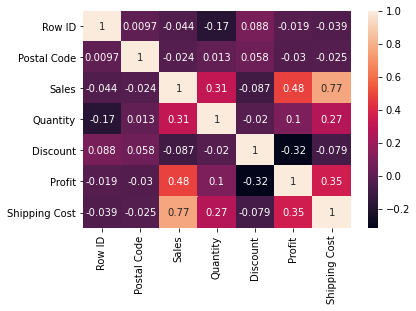

In [11]:
sns.heatmap(data.corr(), annot=True)

- **Jika dilihat data di atas ada korelasi yang cukup kuat antara Shipping Cost dengan Sales**

In [14]:
(pd.crosstab(index = data["Ship Mode"], columns = "Total", normalize= True)*100).round(2)

col_0,Total
Ship Mode,
First Class,14.63
Same Day,5.27
Second Class,20.10
Standard Class,60.00


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

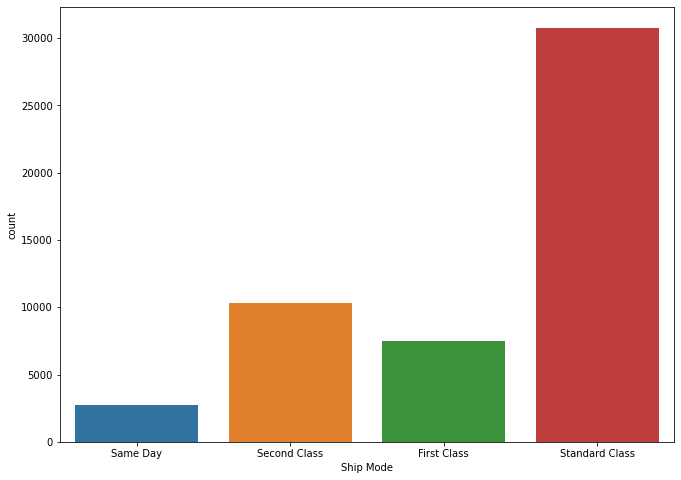

In [15]:
plt.figure(figsize= (11,8))
sns.countplot(x=data["Ship Mode"])

- **60% metode pengiriman menggunakan Standard Class**

In [16]:
pd.crosstab(index= data["Ship Mode"], columns= "Cost Shipping Avg", values = data["Shipping Cost"], aggfunc="mean").sort_values("Cost Shipping Avg", ascending = True)

col_0,Cost Shipping Avg
Ship Mode,
Standard Class,19.971654
Second Class,30.469666
First Class,41.052970
Same Day,42.937325


- **Dikarenakan rata-rata biaya pengiriman menggunakan Standard Class jauh lebih murah dari jenis pengiriman yang lain**

In [17]:
pd.crosstab(index = data["Ship Mode"], columns = data["Order Priority"])

Order Priority,Critical,High,Low,Medium
Ship Mode,,,,
First Class,1734,3413,0,2358
Same Day,742,1269,0,690
Second Class,1456,4010,0,4843
Standard Class,0,6809,2424,21542


- **Sedangkan First Class banyak dipilih dengan status Order Priority Critical**

In [18]:
pd.crosstab(index = data["Country"], columns = "Top 10", values = data["Country"], aggfunc = "count").sort_values("Top 10", ascending = False).head(10)

col_0,Top 10
Country,
United States,9994
Australia,2837
France,2827
Mexico,2644
Germany,2065
China,1880
United Kingdom,1633
Brazil,1599
India,1555


- **10 Negara dengan jumlah transaksi terbanyak**

In [19]:
pd.crosstab(index = data["Country"], columns = "Top 10", values = data["Sales"], aggfunc = "sum").sort_values("Top 10", ascending = False).head(10)

col_0,Top 10
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


- **Top 10 Sales berdasarkan Country**

In [12]:
order_dt = data["Order Date"].dt

In [13]:
data["year"] = order_dt.year

In [14]:
month_dt = data["Order Date"].dt

In [15]:
data["month"] = month_dt.month_name()

In [18]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,February
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,October
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,January
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,November


<AxesSubplot:xlabel='year', ylabel='count'>

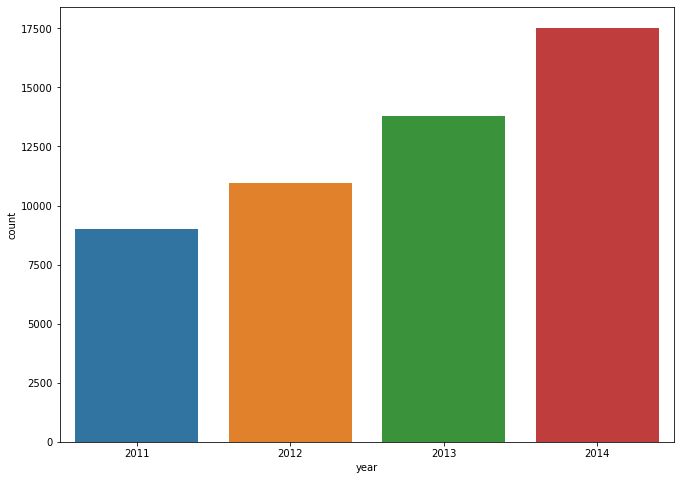

In [18]:
plt.figure(figsize= (11,8))
sns.countplot(x=data["year"])

- **Jumlah transaksi dari tahun 2011 - 2014 selalu meningkat**

In [8]:
pd.crosstab(index = data["year"], columns ="Sales", values= data["Sales"], aggfunc= "sum")

col_0,Sales
year,
2011,2.259451e+06
2012,2.677439e+06
2013,3.405746e+06
2014,4.299866e+06


- **Tren dari tahun 2011 sampai 2014 menunjukan kenaikan sales per tahun**

In [10]:
pd.crosstab(index = data["year"], columns ="Profit", values= data["Profit"], aggfunc= "sum")

col_0,Profit
year,
2011,248940.81154
2012,307415.27910
2013,406935.23018
2014,504165.97046


- **Sehingga ini juga terjadi pada kenaikan profit setiap tahunnya**

In [23]:
pd.crosstab(data["Category"], columns = "Quantity", values = data["Quantity"], aggfunc= "sum").sort_values("Quantity", ascending = False)

col_0,Quantity
Category,
Office Supplies,108182
Technology,35176
Furniture,34954


- **Office Supplies merupakan category dengan Quantity Penjualan terbanyak dengan total 108182**

In [24]:
pd.crosstab(index = [data["year"], data["Category"]], columns = "Quantity", values = data["Quantity"], aggfunc= "sum")

col_0                 Quantity
year Category                 
2011 Furniture            6309
     Office Supplies     18976
     Technology           6158
2012 Furniture            7279
     Office Supplies     23135
     Technology           7697
2013 Furniture            9700
     Office Supplies     29147
     Technology           9289
2014 Furniture           11666
     Office Supplies     36924
     Technology          12032

- **Jika dilihat dari Quantity, permintaan di setiap category meningkat**

In [26]:
pd.crosstab(index = [data["year"], data["Category"]], columns = "Quantity", values = data["Quantity"], aggfunc= "sum")

col_0                 Quantity
year Category                 
2011 Furniture            6309
     Office Supplies     18976
     Technology           6158
2012 Furniture            7279
     Office Supplies     23135
     Technology           7697
2013 Furniture            9700
     Office Supplies     29147
     Technology           9289
2014 Furniture           11666
     Office Supplies     36924
     Technology          12032

In [27]:
pd.crosstab(data["Sub-Category"], columns = "Quantity", values = data["Quantity"], aggfunc= "sum").sort_values("Quantity", ascending = False).head(10)

col_0,Quantity
Sub-Category,
Binders,21429
Storage,16917
Art,16301
Paper,12822
Chairs,12336
Phones,11870
Furnishings,11225
Accessories,10946
Labels,9322


- **Top 10 Sub-Category dengan quantity penjualan terbanyak**

In [28]:
pd.crosstab(data["Product Name"], columns = "Quantity", values = data["Quantity"], aggfunc= "sum").sort_values("Quantity", ascending = False).head(10)

col_0,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


- **Top 10 Produk dengan quantity penjualan terbanyak**